# Project2 Part1 - Text Analysis through TFIDF computation


In [749]:
import numpy as np
from collections import OrderedDict

from text_analyzer import read_sonnets, clean_corpus, tf, get_top_k, idf, tf_idf, cosine_sim

import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [750]:
# run text_analyzer.py with default arguments
!python text_analyzer.py


Sonnet 1 TF (Top 20):
[('the', 6), ('thy', 5), ('to', 4), ('and', 3), ('that', 2), ('might', 2), ('but', 2), ('by', 2), ('his', 2), ('tender', 2), ('thou', 2), ('thine', 2), ('own', 2), ('self', 2), ('worlds', 2), ('from', 1), ('fairest', 1), ('creatures', 1), ('we', 1), ('desire', 1)]

Corpus TF (Top 20):
[('and', 491), ('the', 430), ('to', 408), ('my', 397), ('of', 372), ('i', 343), ('in', 322), ('that', 320), ('thy', 287), ('thou', 235), ('with', 181), ('for', 171), ('is', 168), ('a', 166), ('not', 166), ('me', 164), ('but', 163), ('thee', 162), ('love', 162), ('so', 144)]

Corpus IDF (Top 20):
[('a', 0.46224162391024626), ('abhor', 5.0369526024136295), ('abide', 4.343805421853684), ('able', 5.0369526024136295), ('about', 5.0369526024136295), ('above', 3.6506582412937387), ('absence', 3.427514689979529), ('absent', 3.9383403137455195), ('abundance', 3.6506582412937387), ('abundant', 5.0369526024136295), ('abuse', 3.9383403137455195), ('abused', 5.0369526024136295), ('abuses', 5.036

## a. Read about argparse.
Look at its implementation in the Python Script. Follow the instruction and answer the questions in the Argparse section.

#### TODO: answer here


## b. Read and Clean the data

In [751]:
d_corpus='data/shakespeare_sonnets/'

# return dictionary with keys corresponding to file names and values being the respective contents
corpus = read_sonnets(d_corpus)

# return corpus (dict) with each sonnet cleaned and tokenized for further processing
corpus = clean_corpus(corpus)

In [752]:
corpus['1'] # keys 1-154 for all sonnets (type: str)

['from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'that',
 'thereby',
 'beautys',
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'feedst',
 'thy',
 'lights',
 'flame',
 'with',
 'selfsubstantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'thou',
 'that',
 'art',
 'now',
 'the',
 'worlds',
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'and',
 'tender',
 'churl',
 'makst',
 'waste',
 'in',
 'niggarding',
 'pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'to',
 'eat',
 'the',
 'worlds',
 'due',
 'by',
 'the',
 'grave',
 'and',

## c. TF

In [753]:
# assign 1.txt to variable sonnet to process and find its TF (Note corpus is of type dic, but sonnet1 is just a str)
sonnet1 = corpus['1']

# determine tf of sonnet
sonnet1_tf = tf(sonnet1)

# get sorted list and slice out top 20
sonnet1_top20 = get_top_k(sonnet1_tf)
# print
# print("Sonnet 1 (Top 20):")
df = pd.DataFrame(sonnet1_top20, columns=["word", "count"])
df.head(20)

,word,count
0,the,6
1,thy,5
2,to,4
3,and,3
4,that,2
5,might,2
6,but,2
7,by,2
8,his,2
9,tender,2


In [754]:
# TF of entire corpus
flattened_corpus = [word for sonnet in corpus.values() for word in sonnet]
corpus_tf = tf(flattened_corpus)
corpus_top20 = get_top_k(corpus_tf)
# print
# print("Corpus TF (Top 20):")
df = pd.DataFrame(corpus_top20, columns=["word", "count"])
df.head(20)

,word,count
0,and,491
1,the,430
2,to,408
3,my,397
4,of,372
5,i,343
6,in,322
7,that,320
8,thy,287
9,thou,235


### Q: Discussion
Do you believe the most frequent words would discriminate between documents well? Why or why not? Any thoughts on how we can improve this representation? Does there appear to be any ‘noise’? If so, where? If not, it should be clear by the end of the assignment.

#### TODO: answer here

## d. IDF

In [755]:
# IDF of corpus
corpus_idf = idf(corpus)

corpus_tf_ordered = get_top_k(corpus_idf)
# print top 20 to add to report
df = pd.DataFrame(corpus_tf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,a,0.462242
1,abhor,5.036953
2,abide,4.343805
3,able,5.036953
4,about,5.036953
5,above,3.650658
6,absence,3.427515
7,absent,3.938340
8,abundance,3.650658
9,abundant,5.036953


### Q: observe and briefly comment on the difference in top 20 lists (comparing TF of corpus vs its IDF).

#### TODO: answer here

## e. TF-IDF

In [756]:
# TFIDF of Sonnet1 w.r.t. corpus
sonnet1_tfidf = tf_idf(corpus_idf, sonnet1_tf)
sonnet1_tfidf_ordered = get_top_k(sonnet1_tfidf)
# print
# print("Sonnet 1 TFIDF (Top 20):")
df = pd.DataFrame(sonnet1_tfidf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,the,0.834677
1,thy,3.151167
2,to,0.213384
3,and,0.119221
4,that,0.323511
5,might,3.891820
6,but,0.672944
7,by,1.725131
8,his,2.023202
9,tender,6.490386


### Q. What is different with this list than just using TF?

#### TODO: answer here

## f. Compare all documents

In [757]:
# TODO: Visualize as a heatmap
sonnet_len = len(corpus.keys())

sim_matrix = np.zeros([sonnet_len, sonnet_len]) # 154,154

# '1' = tfidf_score
# '154' = tfidf_score
sonnet_tfidf_dict = OrderedDict.fromkeys(corpus)
for i in range(1, sonnet_len + 1): # 1-indexed

    sonnet_num = str(i) # '1'
    sonnet_curr = corpus[sonnet_num] # retrieve sonnet words from corpus (list)
    sonnet_num_tf = tf(sonnet_curr) # tf score (Dict)

    sonnet_num_tfidf = tf_idf(corpus_idf, sonnet_num_tf) # tfidf score (Dict)

    sonnet_tfidf_dict[sonnet_num] = sonnet_num_tfidf # sonnet_tfidf_dict['1'] = tfidf_score


In [758]:

for i in range(1, sonnet_len + 1): # 1-indexed
    for j in range(1, sonnet_len + 1):  # 1-indexed
        sonnet1 = str(i)
        sonnet2 = str(j)

        s1_tfidf = sonnet_tfidf_dict[sonnet1]
        s2_tfidf = sonnet_tfidf_dict[sonnet2]

        sim_matrix[i-1][j-1] = cosine_sim(s1_tfidf, s2_tfidf)

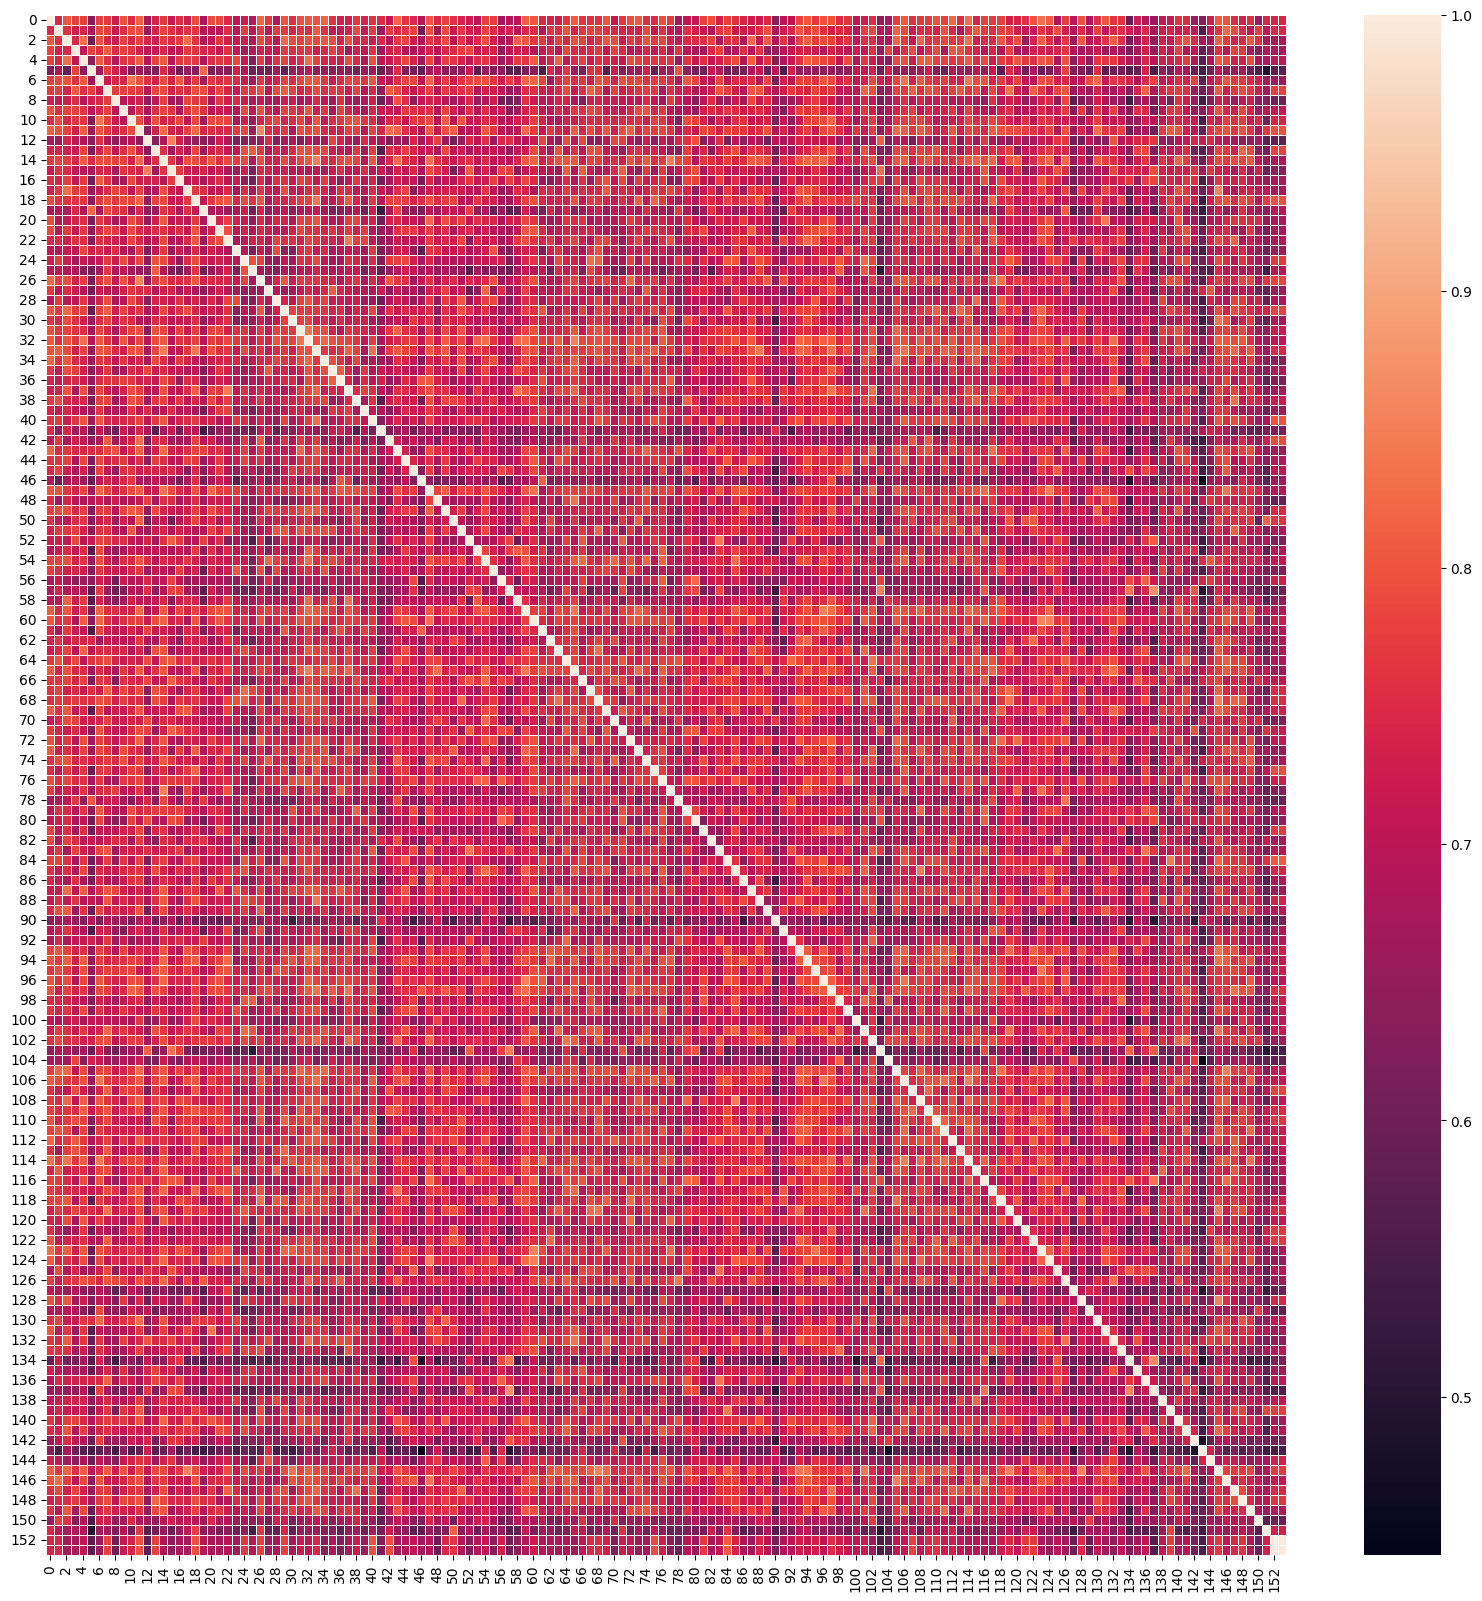

In [759]:
# from sklearn.metrics import confusion_matrix
#
# print(confusion_matrix(sim_matrix))
import seaborn as sns
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(20, 20))
# do labeling starting at 1 and going to 154 for the heatmap
sns.heatmap(sim_matrix, linewidth= .5)

plt.show()

### Q. Observe the heatmap. What insight do you get from it?

#### TODO: answer here
very little similarity between some sonnets (in white) such as 90 and 104
unlike 114 and 141
153 and 154 similar since they are both red like the 1.0 values
can print results of hea